# Analyzing Selection Effects of OD Veto


In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Add the path to the parent directory to augment search for module

if "../../.." not in sys.path:
    print("adding pardir")
    sys.path.append("../../..")

from WatChMaL_analysis.short_tank_EDA.old_reflector_short_tank_exploratory_data_analysis.exploratory_data_analysis_utils import *

adding pardir


## Load Data From H5

In [4]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

hdf5_hit_pmt    = data_file["hit_pmt"]
hdf5_hit_time   = data_file["hit_time"]
hdf5_hit_charge = data_file["hit_charge"]


hit_pmt    = np.memmap(data_path, mode="r", shape=hdf5_hit_pmt.shape,
                                    offset=hdf5_hit_pmt.id.get_offset(), dtype=hdf5_hit_pmt.dtype)

hit_time   = np.memmap(data_path, mode="r", shape=hdf5_hit_time.shape,
                                    offset=hdf5_hit_time.id.get_offset(), dtype=hdf5_hit_time.dtype)

hit_charge = np.memmap(data_path, mode="r", shape=hdf5_hit_charge.shape,
                                    offset=hdf5_hit_charge.id.get_offset(), dtype=hdf5_hit_charge.dtype)

angles     = np.array(data_file['angles'])
energies   = np.array(data_file['energies'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])
root_files = np.array(data_file['root_files'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


## Load Indices

In [5]:
idxs_path = '../../short_tank_EDA/new_reflector_short_tank_exploratory_data_analysis/short_dataset_data/equal_indices.npz'
idxs = np.load(idxs_path, allow_pickle=True)

train_idxs = idxs['train_idxs']
val_idxs   = idxs['val_idxs']
test_idxs  = idxs['test_idxs']

In [6]:
OD_veto_idxs_path = '../../short_tank_EDA/new_reflector_short_tank_exploratory_data_analysis/short_dataset_data/IWCD_mPMT_Short_3M_OD_veto_2_idxs.npz'
OD_veto_idxs = np.load(OD_veto_idxs_path, allow_pickle=True)

OD_veto_train_idxs = OD_veto_idxs['train_idxs']
OD_veto_val_idxs   = OD_veto_idxs['val_idxs']
OD_veto_test_idxs  = OD_veto_idxs['test_idxs']

## Split Datasets

In [7]:
train_angles    = angles[train_idxs]
train_energies  = energies[train_idxs]
train_positions = positions[train_idxs]
train_labels    = labels[train_idxs]

train_info = {'name':'Training Set','energies':train_energies,'positions':train_positions, 'angles':train_angles, 'labels':train_labels}

print("Done train info")

val_angles     = angles[val_idxs]
val_energies   = energies[val_idxs]
val_positions  = positions[val_idxs]
val_labels     = labels[val_idxs]

val_info = {'name':'Validation Set','energies':val_energies,'positions':val_positions, 'angles':val_angles, 'labels':val_labels}

print("Done val info")

test_angles    = angles[test_idxs]
test_energies  = energies[test_idxs]
test_positions = positions[test_idxs]
test_labels    = labels[test_idxs]
test_info = {'name':'Test Set','energies':test_energies,'positions':test_positions, 'angles':test_angles, 'labels':test_labels}

print("Done test info")

Done train info
Done val info
Done test info


In [8]:
dataset_info = [train_info, val_info, test_info]

In [9]:
train_angles    = angles[OD_veto_train_idxs]
train_energies  = energies[OD_veto_train_idxs]
train_positions = positions[OD_veto_train_idxs]
train_labels    = labels[OD_veto_train_idxs]

train_info = {'name':'Training Set','energies':train_energies,'positions':train_positions, 'angles':train_angles, 'labels':train_labels}

print("Done train info")

val_angles     = angles[OD_veto_val_idxs]
val_energies   = energies[OD_veto_val_idxs]
val_positions  = positions[OD_veto_val_idxs]
val_labels     = labels[OD_veto_val_idxs]

val_info = {'name':'Validation Set','energies':val_energies,'positions':val_positions, 'angles':val_angles, 'labels':val_labels}

print("Done val info")

test_angles    = angles[OD_veto_test_idxs]
test_energies  = energies[OD_veto_test_idxs]
test_positions = positions[OD_veto_test_idxs]
test_labels    = labels[OD_veto_test_idxs]
test_info = {'name':'Test Set','energies':test_energies,'positions':test_positions, 'angles':test_angles, 'labels':test_labels}

print("Done test info")

Done train info
Done val info
Done test info


In [10]:
OD_veto_dataset_info = [train_info, val_info, test_info]

In [11]:
## Get indices associated with each dataset and particle type

In [12]:
train_g_idxs = np.where(dataset_info[0]['labels']==0)[0]
val_g_idxs   = np.where(dataset_info[1]['labels']==0)[0]
test_g_idxs  = np.where(dataset_info[2]['labels']==0)[0]

g_idxs = np.concatenate((train_g_idxs, val_g_idxs, test_g_idxs))

train_e_idxs = np.where(dataset_info[0]['labels']==1)[0]
val_e_idxs   = np.where(dataset_info[1]['labels']==1)[0]
test_e_idxs  = np.where(dataset_info[2]['labels']==1)[0]

e_idxs = np.concatenate((train_e_idxs, val_e_idxs, test_e_idxs))

train_m_idxs = np.where(dataset_info[0]['labels']==2)[0]
val_m_idxs   = np.where(dataset_info[1]['labels']==2)[0]
test_m_idxs  = np.where(dataset_info[2]['labels']==2)[0]

m_idxs = np.concatenate((train_m_idxs, val_m_idxs, test_m_idxs))

In [13]:
OD_veto_train_g_idxs = np.where(OD_veto_dataset_info[0]['labels']==0)[0]
OD_veto_val_g_idxs   = np.where(OD_veto_dataset_info[1]['labels']==0)[0]
OD_veto_test_g_idxs  = np.where(OD_veto_dataset_info[2]['labels']==0)[0]

OD_veto_g_idxs = np.concatenate((OD_veto_train_g_idxs, OD_veto_val_g_idxs, OD_veto_test_g_idxs))

OD_veto_train_e_idxs = np.where(OD_veto_dataset_info[0]['labels']==1)[0]
OD_veto_val_e_idxs   = np.where(OD_veto_dataset_info[1]['labels']==1)[0]
OD_veto_test_e_idxs  = np.where(OD_veto_dataset_info[2]['labels']==1)[0]

OD_veto_e_idxs = np.concatenate((OD_veto_train_e_idxs, OD_veto_val_e_idxs, OD_veto_test_e_idxs))

OD_veto_train_m_idxs = np.where(OD_veto_dataset_info[0]['labels']==2)[0]
OD_veto_val_m_idxs   = np.where(OD_veto_dataset_info[1]['labels']==2)[0]
OD_veto_test_m_idxs  = np.where(OD_veto_dataset_info[2]['labels']==2)[0]

OD_veto_m_idxs = np.concatenate((OD_veto_train_m_idxs, OD_veto_val_m_idxs, OD_veto_test_m_idxs))

In [14]:
## Load Energies

In [15]:
# Load normal energies
train_g_energies = dataset_info[0]['energies'][train_g_idxs]
val_g_energies   = dataset_info[1]['energies'][val_g_idxs]
test_g_energies  = dataset_info[2]['energies'][test_g_idxs]

g_energies = np.concatenate((train_g_energies, val_g_energies, test_g_energies))

train_e_energies = dataset_info[0]['energies'][train_e_idxs]
val_e_energies   = dataset_info[1]['energies'][val_e_idxs]
test_e_energies  = dataset_info[2]['energies'][test_e_idxs]

e_energies = np.concatenate((train_e_energies, val_e_energies, test_e_energies))

train_m_energies = dataset_info[0]['energies'][train_m_idxs]
val_m_energies   = dataset_info[1]['energies'][val_m_idxs]
test_m_energies  = dataset_info[2]['energies'][test_m_idxs]

m_energies = np.concatenate((train_m_energies, val_m_energies, test_m_energies))

In [16]:
# Load normal energies
OD_veto_train_g_energies = OD_veto_dataset_info[0]['energies'][OD_veto_train_g_idxs]
OD_veto_val_g_energies   = OD_veto_dataset_info[1]['energies'][OD_veto_val_g_idxs]
OD_veto_test_g_energies  = OD_veto_dataset_info[2]['energies'][OD_veto_test_g_idxs]

OD_veto_g_energies = np.concatenate((OD_veto_train_g_energies, OD_veto_val_g_energies, OD_veto_test_g_energies))

OD_veto_train_e_energies = OD_veto_dataset_info[0]['energies'][OD_veto_train_e_idxs]
OD_veto_val_e_energies   = OD_veto_dataset_info[1]['energies'][OD_veto_val_e_idxs]
OD_veto_test_e_energies  = OD_veto_dataset_info[2]['energies'][OD_veto_test_e_idxs]

OD_veto_e_energies = np.concatenate((OD_veto_train_e_energies, OD_veto_val_e_energies, OD_veto_test_e_energies))

OD_veto_train_m_energies = OD_veto_dataset_info[0]['energies'][OD_veto_train_m_idxs]
OD_veto_val_m_energies   = OD_veto_dataset_info[1]['energies'][OD_veto_val_m_idxs]
OD_veto_test_m_energies  = OD_veto_dataset_info[2]['energies'][OD_veto_test_m_idxs]

OD_veto_m_energies = np.concatenate((OD_veto_train_m_energies, OD_veto_val_m_energies, OD_veto_test_m_energies))

In [17]:
# Distribution of event energies by dataset and particle type

In [18]:
print(OD_veto_train_g_energies.shape)
print(train_g_energies.shape)

(1477642, 1)
(1478191, 1)


No handles with labels found to put in legend.


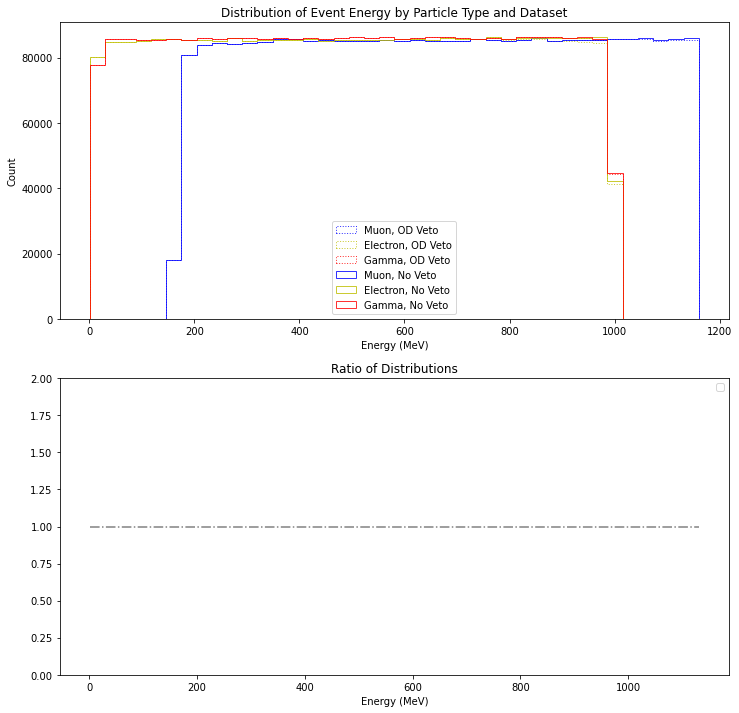

In [19]:
fig = plot_compare_dists([np.squeeze(g_energies), np.squeeze(e_energies), np.squeeze(m_energies),
                          np.squeeze(OD_veto_g_energies), np.squeeze(OD_veto_e_energies), np.squeeze(OD_veto_m_energies)],
                         numerator_dist_idxs   = [],
                         denominator_dist_idxs = [],
                         bins=40,
                         labels=[
                                  'Gamma, No Veto', 'Electron, No Veto', 'Muon, No Veto',
                                  'Gamma, OD Veto', 'Electron, OD Veto', 'Muon, OD Veto'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy by Particle Type and Dataset', 
                         colors =  ['r','y','b','r','y','b'],
                         linestyle=['-','-','-',':',':',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center',
                         normalized=False
                    )

In [20]:
GAMMA_THRESHOLD = 1.55
ELECTRON_THRESHOLD = 0.775
MUON_THRESHOLD = 160.26

No handles with labels found to put in legend.


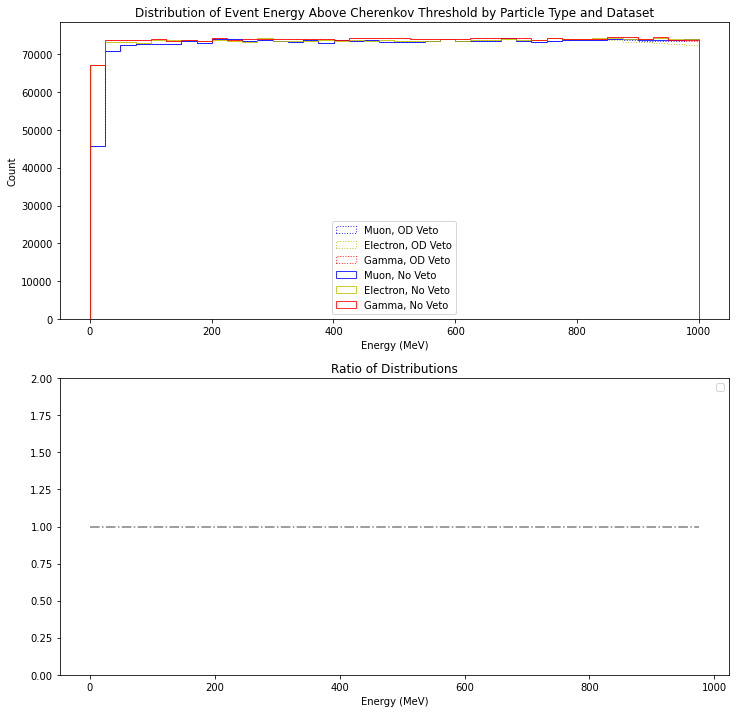

In [21]:
fig = plot_compare_dists([np.squeeze(g_energies) - GAMMA_THRESHOLD, np.squeeze(e_energies) - ELECTRON_THRESHOLD, np.squeeze(m_energies) - MUON_THRESHOLD,
                          np.squeeze(OD_veto_g_energies) - GAMMA_THRESHOLD, np.squeeze(OD_veto_e_energies) - ELECTRON_THRESHOLD, np.squeeze(OD_veto_m_energies) - MUON_THRESHOLD],
                         numerator_dist_idxs   = [],
                         denominator_dist_idxs = [],
                         bins=40,
                         labels=[
                                  'Gamma, No Veto', 'Electron, No Veto', 'Muon, No Veto',
                                  'Gamma, OD Veto', 'Electron, OD Veto', 'Muon, OD Veto'],
                         ratio_range=[0,2],
                         title='Distribution of Event Energy Above Cherenkov Threshold by Particle Type and Dataset', 
                         colors =  ['r','y','b','r','y','b'],
                         linestyle=['-','-','-',':',':',':'], 
                         xlabel='Energy (MeV)',
                         loc='lower center',
                         normalized=False
                    )

No handles with labels found to put in legend.


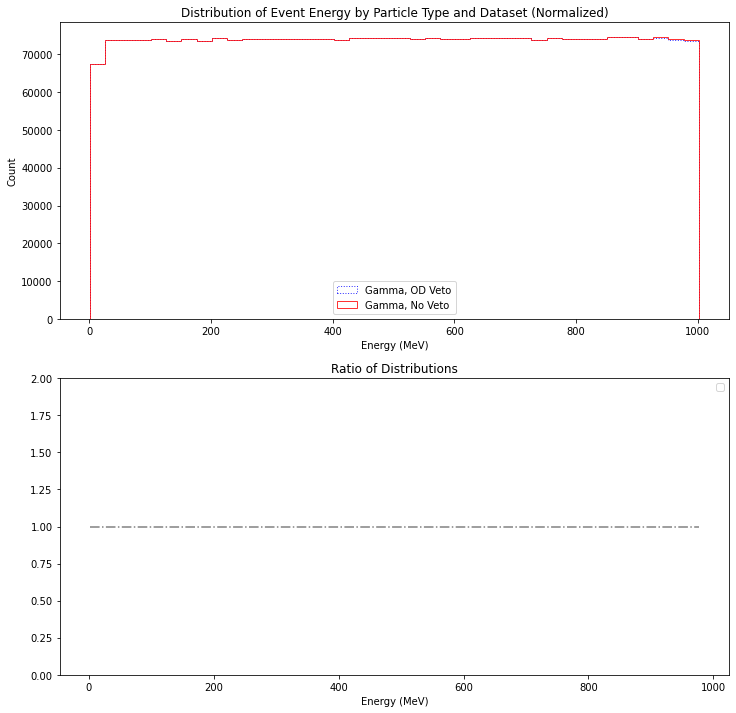

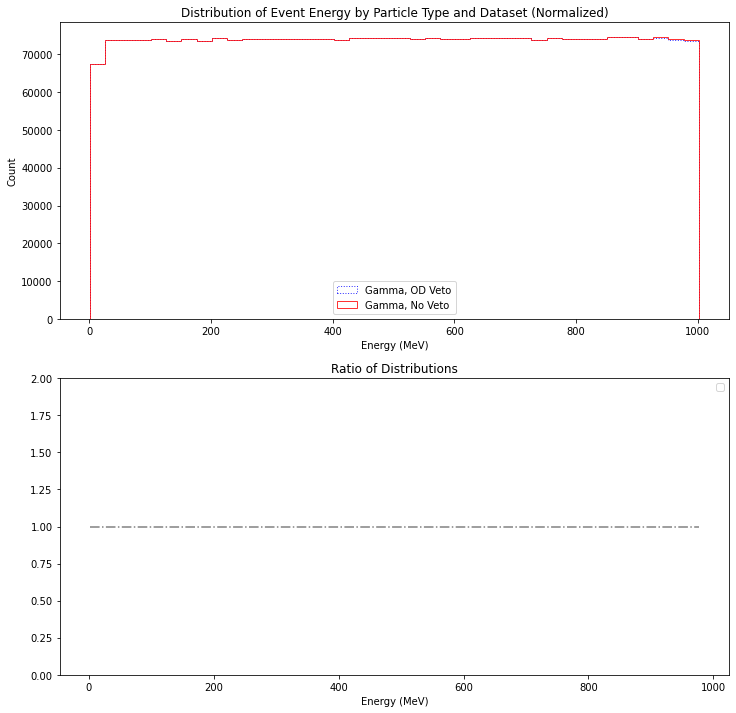

In [22]:
# Just gammas
plot_compare_dists([np.squeeze(g_energies), np.squeeze(OD_veto_g_energies)],
                     numerator_dist_idxs   = [],
                     denominator_dist_idxs = [],
                     bins=40,
                     labels=[
                              'Gamma, No Veto', 
                              'Gamma, OD Veto'],
                     ratio_range=[0,2],
                     title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                     colors =  ['r','b'],
                     linestyle=['-',':'], 
                     xlabel='Energy (MeV)',
                     loc='lower center',
                     normalized=False
                    )

No handles with labels found to put in legend.


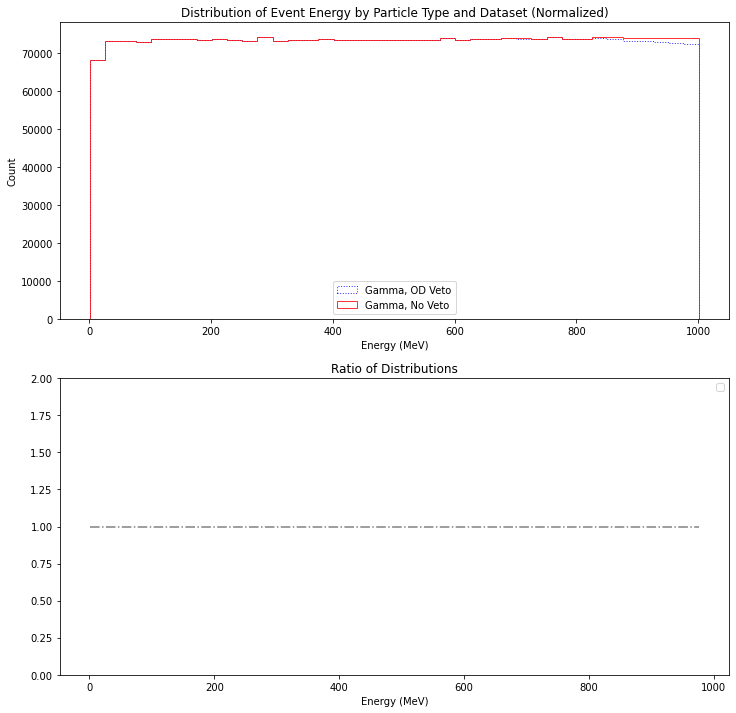

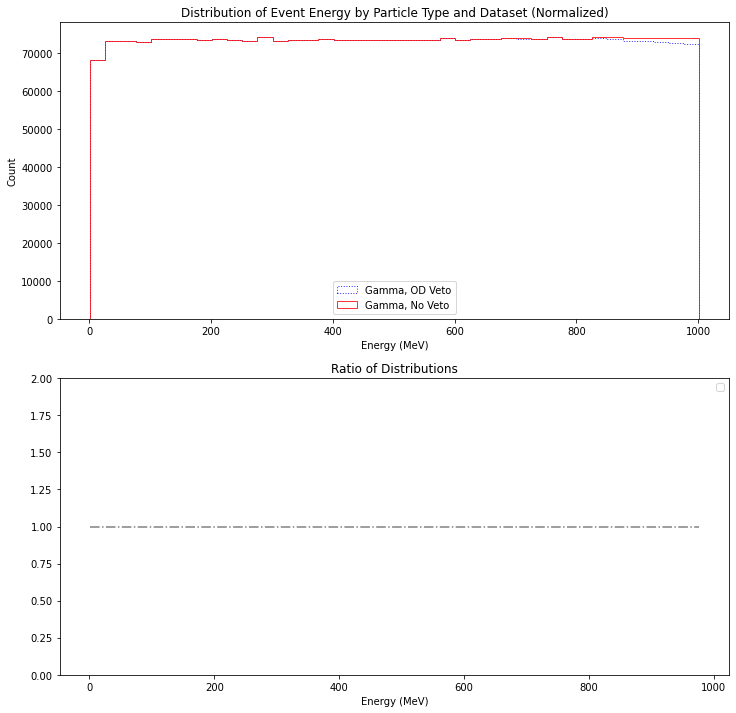

In [23]:
# Just electrons
plot_compare_dists([np.squeeze(e_energies), np.squeeze(OD_veto_e_energies)],
                     numerator_dist_idxs   = [],
                     denominator_dist_idxs = [],
                     bins=40,
                     labels=[
                              'Gamma, No Veto', 
                              'Gamma, OD Veto'],
                     ratio_range=[0,2],
                     title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                     colors =  ['r','b'],
                     linestyle=['-',':'], 
                     xlabel='Energy (MeV)',
                     loc='lower center',
                     normalized=False
                    )

No handles with labels found to put in legend.


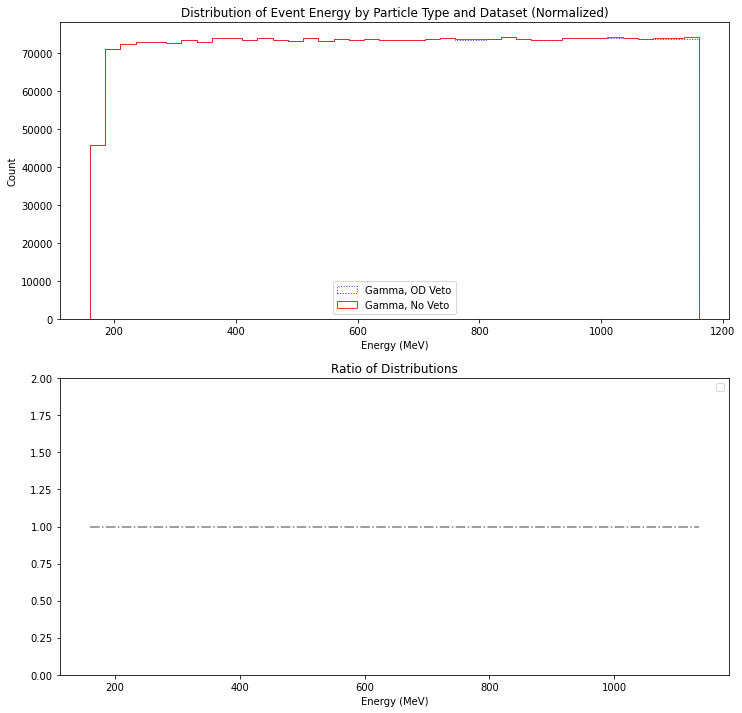

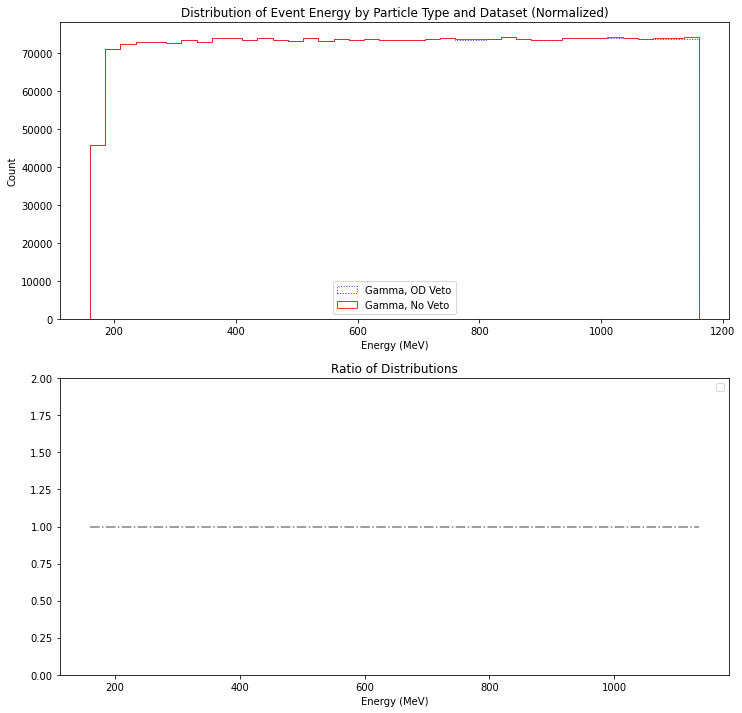

In [24]:
# Just muons
plot_compare_dists([np.squeeze(m_energies), np.squeeze(OD_veto_m_energies)],
                     numerator_dist_idxs   = [],
                     denominator_dist_idxs = [],
                     bins=40,
                     labels=[
                              'Gamma, No Veto', 
                              'Gamma, OD Veto'],
                     ratio_range=[0,2],
                     title='Distribution of Event Energy by Particle Type and Dataset (Normalized)', 
                     colors =  ['r','b'],
                     linestyle=['-',':'], 
                     xlabel='Energy (MeV)',
                     loc='lower center',
                     normalized=False
                    )

## Distribution of distance to wall along particle trajectory

In [25]:
d_to_wall = np.load('../../short_tank_EDA/new_reflector_short_tank_exploratory_data_analysis/short_dataset_data/dist_to_wall.npz', allow_pickle=True)

dataset_info[0]['d_to_wall'] = d_to_wall['train_d_to_wall']
dataset_info[1]['d_to_wall'] = d_to_wall['val_d_to_wall']
dataset_info[2]['d_to_wall'] = d_to_wall['test_d_to_wall']

In [26]:
# Compute distance to wall for all events

pbar = ProgressBar(widgets=['Calculating Distance to Wall. Progress: ', Percentage(), ' ', Bar(marker='0',left='[',right=']'),
           ' ', ETA()], maxval=reduce(lambda x,y:x+y , list(map(lambda x : x['positions'].shape[0], OD_veto_dataset_info))))

pbar.start()
done=0
for dset in OD_veto_dataset_info:
    d_to_wall = []
    for i in range(dset['positions'].shape[0]):
        pbar.update(done + i)
        d_to_wall.append(distance_to_wall(dset['positions'][i][0], dset['angles'][i]))
        dset['d_to_wall'] = d_to_wall
    done = done + dset['positions'].shape[0]
pbar.finish()

np.savez('./performance_analysis_data/OD_veto_2_dist_to_wall.npz', train_d_to_wall= OD_veto_dataset_info[0]['d_to_wall'],
                                                  val_d_to_wall  = OD_veto_dataset_info[1]['d_to_wall'],
                                                  test_d_to_wall = OD_veto_dataset_info[2]['d_to_wall'])


Calculating Distance to Wall. Progress: 100% [000000000000000000] Time: 0:14:55


In [27]:
OD_veto_d_to_wall = np.load('./performance_analysis_data/OD_veto_2_dist_to_wall.npz', allow_pickle=True)

OD_veto_dataset_info[0]['d_to_wall'] = OD_veto_d_to_wall['train_d_to_wall']
OD_veto_dataset_info[1]['d_to_wall'] = OD_veto_d_to_wall['val_d_to_wall']
OD_veto_dataset_info[2]['d_to_wall'] = OD_veto_d_to_wall['test_d_to_wall']

## By particle type and dataset

In [28]:
# Load normal d_to_wall
train_g_d_to_wall = dataset_info[0]['d_to_wall'][train_g_idxs]
val_g_d_to_wall   = dataset_info[1]['d_to_wall'][val_g_idxs]
test_g_d_to_wall  = dataset_info[2]['d_to_wall'][test_g_idxs]

g_d_to_wall = np.concatenate((train_g_d_to_wall, val_g_d_to_wall, test_g_d_to_wall))

train_e_d_to_wall = dataset_info[0]['d_to_wall'][train_e_idxs]
val_e_d_to_wall   = dataset_info[1]['d_to_wall'][val_e_idxs]
test_e_d_to_wall  = dataset_info[2]['d_to_wall'][test_e_idxs]

e_d_to_wall = np.concatenate((train_e_d_to_wall, val_e_d_to_wall, test_e_d_to_wall))

train_m_d_to_wall = dataset_info[0]['d_to_wall'][train_m_idxs]
val_m_d_to_wall   = dataset_info[1]['d_to_wall'][val_m_idxs]
test_m_d_to_wall  = dataset_info[2]['d_to_wall'][test_m_idxs]

m_d_to_wall = np.concatenate((train_m_d_to_wall, val_m_d_to_wall, test_m_d_to_wall))

In [29]:
# Load OD veto d_to_wall
OD_veto_train_g_d_to_wall = OD_veto_dataset_info[0]['d_to_wall'][OD_veto_train_g_idxs]
OD_veto_val_g_d_to_wall   = OD_veto_dataset_info[1]['d_to_wall'][OD_veto_val_g_idxs]
OD_veto_test_g_d_to_wall  = OD_veto_dataset_info[2]['d_to_wall'][OD_veto_test_g_idxs]

OD_veto_g_d_to_wall = np.concatenate((OD_veto_train_g_d_to_wall, OD_veto_val_g_d_to_wall, OD_veto_test_g_d_to_wall))

OD_veto_train_e_d_to_wall = OD_veto_dataset_info[0]['d_to_wall'][OD_veto_train_e_idxs]
OD_veto_val_e_d_to_wall   = OD_veto_dataset_info[1]['d_to_wall'][OD_veto_val_e_idxs]
OD_veto_test_e_d_to_wall  = OD_veto_dataset_info[2]['d_to_wall'][OD_veto_test_e_idxs]

OD_veto_e_d_to_wall = np.concatenate((OD_veto_train_e_d_to_wall, OD_veto_val_e_d_to_wall, OD_veto_test_e_d_to_wall))

OD_veto_train_m_d_to_wall = OD_veto_dataset_info[0]['d_to_wall'][OD_veto_train_m_idxs]
OD_veto_val_m_d_to_wall   = OD_veto_dataset_info[1]['d_to_wall'][OD_veto_val_m_idxs]
OD_veto_test_m_d_to_wall  = OD_veto_dataset_info[2]['d_to_wall'][OD_veto_test_m_idxs]

OD_veto_m_d_to_wall = np.concatenate((OD_veto_train_m_d_to_wall, OD_veto_val_m_d_to_wall, OD_veto_test_m_d_to_wall))

No handles with labels found to put in legend.


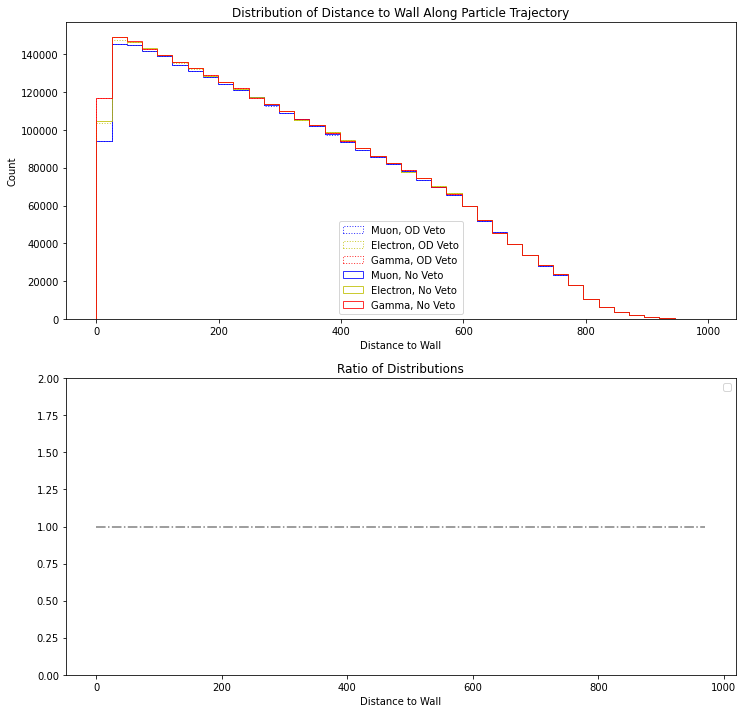

In [30]:
# Just muons
patches = plot_compare_dists(
                     [np.squeeze(g_d_to_wall), np.squeeze(e_d_to_wall), np.squeeze(m_d_to_wall),
                      np.squeeze(OD_veto_g_d_to_wall), np.squeeze(OD_veto_e_d_to_wall), np.squeeze(OD_veto_m_d_to_wall),
                     ],
                     numerator_dist_idxs   = [],
                     denominator_dist_idxs = [],
                     bins=40,
                     labels=['Gamma, No Veto', 'Electron, No Veto', 'Muon, No Veto',
                             'Gamma, OD Veto', 'Electron, OD Veto', 'Muon, OD Veto'],
                     ratio_range=[0,2],
                     title='Distribution of Distance to Wall Along Particle Trajectory', 
                     colors =  ['r', 'y', 'b',
                                'r', 'y', 'b'],
                     linestyle=['-', '-', '-',
                                ':', ':', ':'], 
                     xlabel='Distance to Wall',
                     loc='lower center',
                     normalized=False
                    )